In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import load_boston

boston = load_boston()

bos = pd.DataFrame(boston.data)


bos.columns = boston.feature_names



bos['MEDV'] = boston.target




x= bos.drop('MEDV', axis=1)
#=bos[['RM']]
y = bos['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 8)


lrg = LinearRegression()

lrg.fit(X_train, Y_train)

print('Linear Regression')
print ('mse = ', mean_squared_error(Y_test,lrg.predict(X_test)))
print ('rmse = ',np.sqrt(mean_squared_error(Y_test,lrg.predict(X_test))))
print ('mae =',  mean_absolute_error(Y_test,lrg.predict(X_test)))
print ('r2 =',  r2_score(Y_test,lrg.predict(X_test)))


gb = GradientBoostingRegressor()

gb.fit(X_train, Y_train)

print('Ensemble Regression')
print ('mse = ', mean_squared_error(Y_test,gb.predict(X_test)))
print ('rmse = ', np.sqrt(mean_squared_error(Y_test,gb.predict(X_test))))
print ('mae =',  mean_absolute_error(Y_test,gb.predict(X_test)))
print ('r2 =',  r2_score(Y_test,gb.predict(X_test)))


Linear Regression
mse =  24.393123647910024
rmse =  4.938939526650435
mae = 3.5959346015480196
r2 = 0.6921420412834404
Ensemble Regression
mse =  12.056551328279292
rmse =  3.472254502233281
mae = 2.4999445667763975
r2 = 0.847838049170734


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, roc_auc_score

iris = load_iris()

df = pd.DataFrame(iris.data)

df.columns = ['sl', 'sw', 'pl', 'pw']

df['class'] = iris.target

X = df.drop('class', axis=1).values
y = df['class'].values


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 8)

model = LogisticRegression(max_iter=100000)
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

acc = accuracy_score(Y_test, Y_pred)
rep = classification_report(Y_test, Y_pred)
conf = confusion_matrix(Y_test, Y_pred)
pre = precision_score(Y_test, Y_pred, average='macro')
rec = recall_score(Y_test, Y_pred, average='macro')


auc = roc_auc_score(Y_test, model.predict_proba(X_test), multi_class='ovr')

print('Accuracy\n', acc)
print('Classification Report\n', rep)
print('Precision\n', pre)
print('Recall\n', rec)
print('AUC\n' + str(auc) )


print(conf)

conf = pd.DataFrame(conf)

conf

Accuracy
 0.94
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      0.94      0.91        16
           2       0.93      0.88      0.90        16

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

Precision
 0.9385620915032679
Recall
 0.9375
AUC
0.9920343137254902
[[18  0  0]
 [ 0 15  1]
 [ 0  2 14]]


,0,1,2
0,18,0,0
1,0,15,1
2,0,2,14


In [ ]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X_train,Y_train, cv=5)

print(scores.mean())

print(scores.std())

0.95
0.04472135954999579


In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix

boston = load_boston()

x, y = boston.data, boston.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=8)

scale = MinMaxScaler(feature_range=(-1,1)).fit(x_train)

x_train = scale.transform(x_train)
x_test = scale.transform(x_test)

svr = SVR(C=10, kernel='rbf', gamma=1)

cv = cross_val_score(svr, x_train, y_train, cv=10)

print('Scores ', cv )
print("Mean",cv.mean())
print("STD", cv.std())

model = svr.fit(x_train, y_train)


score = model.score(x_test, y_test)

score

Scores  [0.89785977 0.75583125 0.62506676 0.8466102  0.73157064 0.43306986
 0.74681074 0.82646471 0.79583261 0.75383571]
Mean 0.7412952267015396
STD 0.12443365643373965


0.8452265966289406

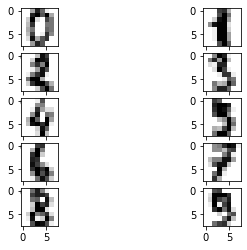

Uniques and counts:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))


In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

digits = load_digits()

x, y = digits.data, digits.target


for i in range(10):
    plt.subplot(5, 2, i+1)
    plt.imshow(digits.images[i], cmap='binary', interpolation='none')

plt.show()

uniques = np.unique(y, return_counts=True)

print("Uniques and counts: ",uniques)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)


x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)


In [ ]:
svc = SVC(class_weight="balanced", kernel='rbf', C=1, gamma=0.1)

cv = cross_val_score(svc, x_train, y_train, cv=10)

print('Values', cv)
print('Avg ' , cv.mean())
print('Std ' , cv.std())

model = svc.fit(x_train, y_train)

score = model.score(x_test, y_test)

print('Score', score)

y_pred = model.predict(x_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

cm

Values [0.98412698 0.99206349 0.99206349 0.99206349 0.99206349 0.99206349
 0.98412698 0.976      1.         1.        ]
Avg  0.9904571428571429
Std  0.00695833911541757
Score 0.9925925925925926


,0,1,2,3,4,5,6,7,8,9
0,45,0,0,0,0,0,0,0,0,0
1,0,51,0,0,0,0,0,0,1,0
2,0,0,52,0,0,0,0,1,0,0
3,0,0,0,54,0,0,0,0,0,0
4,0,0,0,0,48,0,0,0,0,0
5,0,0,0,0,0,55,1,0,0,1
6,0,0,0,0,0,0,60,0,0,0
7,0,0,0,0,0,0,0,53,0,0
8,0,0,0,0,0,0,0,0,61,0
9,0,0,0,0,0,0,0,0,0,57


In [ ]:
import numpy as np
import pandas as pd

from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_iris

iris = load_iris()

x = pd.DataFrame(iris.data)
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=0)

#print("Before\n", x_train)

scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train)

x_train = scaling.transform(x_train)
x_test = scaling.transform(x_test)

#print("After\n", x_train)
svm = LinearSVC(C=100, loss='hinge', max_iter=100000)

cv = cross_val_score(svm, x_train, y_train, cv=10)

print('Values', cv)
print('Avg ' , cv.mean())
print('Std ' , cv.std())



svm.fit(x_train, y_train)

print(svm.score(x_test,y_test))

y_pred = svm.predict(x_test)

cm = pd.DataFrame(confusion_matrix(y_test, y_pred))

cm

Values [0.90909091 0.81818182 0.90909091 1.         1.         1.
 0.9        0.9        1.         0.9       ]
Avg  0.9336363636363638
Std  0.059620008843889426
0.9333333333333333


,0,1,2
0,16,0,0
1,0,15,3
2,0,0,11
